## INCLUDES:

# LOGISTIC REGRESSION

# DECISION TREE CLASSIFIER

# RANDOM FOREST CLASSIFIER

# GRADIENT BOOSTING CLASSIFIER

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import my_pickle as mp
import my_resample as ms

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score

from sklearn.ensemble.partial_dependence import plot_partial_dependence
# from sklearn.model_selection import GridSearchCV

# from sklearn.model_selection import KFold
# from sklearn.metrics import roc_curve, auc
# from scipy import interp
# from random import *
# import matplotlib.pyplot as plt
# %matplotlib inline

# from sklearn.ensemble.partial_dependence import plot_partial_dependence
# from sklearn.ensemble.partial_dependence import partial_dependence

In [10]:
X = mp.unjson_it('data_X')
y = mp.unjson_it('data_y')['response']

In [6]:
text_similarity_df = mp.unjson_it('data_text_similarity')
X['count_similarity'] = text_similarity_df['count_similarity']
X['tfidf_similarity'] = text_similarity_df['tfidf_similarity']

In [7]:
X.head()

,I_count_receiver,I_count_sender,age_dif,age_receiver,age_sender,amenities_overlap,distance,exclaim_count_receiver,exclaim_count_sender,gender_receiver,...,smokingOk_receiver,smokingOk_sender,term_receiver,term_sender,type_receiver,type_sender,urgency_receiver,urgency_sender,count_similarity,tfidf_similarity
02sjTzcsaO02omVxM8Xm,0,0.0,3.0,25,22.0,0,37.806874,0,0.0,0,...,1,1.0,6.0,11.450264,1.000000,0.862843,1.723056e+09,-6.768931e+09,0,0.0
07Aj9wLBPC013LzOrVju,0,2.0,6.0,24,30.0,1,5.482670,0,1.0,1,...,0,1.0,2.0,4.000000,1.000000,0.862843,2.679062e+09,2.624028e+08,0,0.0
07lVtClAEQ01iDVeaXl1,6,0.0,5.0,20,25.0,3,1.207884,2,0.0,0,...,1,1.0,13.0,12.000000,0.909091,1.000000,-4.618784e+08,3.196406e+08,0,0.0
0AFU6guKDt01iDVeaXl1,1,0.0,3.0,22,25.0,2,41.182387,0,0.0,0,...,0,1.0,12.0,12.000000,1.000000,1.000000,2.679062e+09,3.196002e+08,0,0.0
0AFU6guKDt01mfWG4vUm,0,1.0,4.0,26,22.0,1,46.212738,0,0.0,1,...,0,0.0,12.0,12.000000,1.000000,1.000000,2.679062e+09,-6.768931e+09,0,0.0


# MAIN FN

In [8]:
def my_pipeline(model, lst, verbose=False):
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), random_state=17)

    # resample
    X_train, y_train = ms.oversample(X_train, y_train, .5)

    # scale data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # fit data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    
#     clf = GradientBoostingRegressor(n_estimators=10).fit(X, y)
    try:
        fig, axs = plot_partial_dependence(model, X_train, lst) 
        plt.show()
    except:
        pass
        
    if verbose:
        print("\nMETRICS")
        print("Model recall: {}".format(recall_score(y_test, y_pred)))
        print("Model precision: {}".format(precision_score(y_test, y_pred)))
        print("Model accuracy: {}".format(model.score(X_test, y_test)))

        print ("\nCONFUSION MATRIX")
        print (confusion_matrix(y_test, y_pred))
        print ("\nkey:")
        print (" TN   FP ")
        print (" FN   TP ")

        pred_all_0 = [0]*len(y_test)
        pred_all_1 = [1]*len(y_test)
        pred_50_50 = np.random.choice([0,1], size=len(y_test))
        pred_90_10 = np.random.choice([0,1], size=len(y_test), p=[.9,.1])
        
        print("\nRECALL AND ACCURACY FOR DIFFERNET MODELS")
        print("recall     \t precision   \tmodel")
        print(recall_score(y_test, y_pred), '\t',precision_score(y_test, y_pred), "my model")
        print(recall_score(y_test, pred_all_0),'\t','\t', precision_score(y_test, pred_all_0), "\t\tpredict all zero")
        print(recall_score(y_test, pred_all_1),'\t','\t', precision_score(y_test, pred_all_1), "predict all one")
        print(recall_score(y_test, pred_50_50),'\t', precision_score(y_test, pred_50_50), "predict 50-50")
        print(recall_score(y_test, pred_90_10), precision_score(y_test, pred_90_10), "predict 90-10")
        
    return recall_score(y_test, y_pred), precision_score(y_test, y_pred), model.score(X_test, y_test)



# RANDOM FOREST CLASSIFIER

In [ ]:
model = RandomForestClassifier(max_depth=50, max_features=None, min_samples_leaf=3, n_estimators=100, n_jobs=-1)
my_pipeline(model, [70], True)

feature_importances = np.argsort(model.feature_importances_)
top_n = len(feature_importances)
print("\nFEATURE RANKINGS")
for n in range(top_n):
    print(n+1, '\t',X.columns[feature_importances[-n-1]], '\t',sorted(model.feature_importances_)[-n-1])

# GRADIENT BOOSTING CLASSIFIER

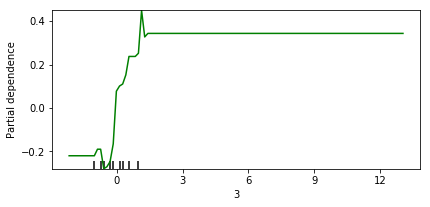


METRICS
Model recall: 0.5870307167235495
Model precision: 0.21799746514575413
Model accuracy: 0.7347232207045291

CONFUSION MATRIX
[[1872  617]
 [ 121  172]]

key:
 TN   FP 
 FN   TP 

RECALL AND ACCURACY FOR DIFFERNET MODELS
recall     	 precision   	model
0.587030716724 	 0.217997465146 my model
0.0 	 	 0.0 		predict all zero
1.0 	 	 0.105319913731 predict all one
0.508532423208 	 0.10405027933 predict 50-50
0.0887372013652 0.0962962962963 predict 90-10

FEATURE RANKINGS
1 	 len_about_receiver 	 0.0930369972405 	 30
2 	 urgency_receiver 	 0.0906692909373 	 69
3 	 urgency_sender 	 0.0867761427414 	 70
4 	 age_receiver 	 0.0674039191321 	 3
5 	 distance 	 0.0620416513461 	 6
6 	 isStudent_receiver 	 0.0489463580754 

/Users/gandalf/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	 28
7 	 maxCost_receiver 	 0.0445270412433 	 32
8 	 numRoommates_receiver 	 0.0394303745811 	 37
9 	 hobbies_overlap 	 0.0347031187559 	 21
10 	 age_dif 	 0.0282207582392 	 2
11 	 term_sender 	 0.0272234536842 	 66
12 	 gender_sender 	 0.0253717537992 	 10
13 	 minCost_receiver 	 0.0212824489711 	 34
14 	 minCost_sender 	 0.0206101347966 	 35
15 	 isStudent_sender 	 0.0201350845155 	 29
16 	 age_sender 	 0.018686385865 	 4
17 	 I_count_receiver 	 0.0179074061981 	 0
18 	 period_count_receiver 	 0.0167457020288 	 39
19 	 sentence_count_receiver 	 0.0164845968154 	 61
20 	 maxCost_sender 	 0.0164477679113 	 33
21 	 len_about_sender 	 0.0147366907073 	 31
22 	 isClean_receiver 	 0.0113353428277 	 24
23 	 has_room_receiver 	 0.011113443599 	 19
24 	 has_facebookId_receiver 	 0.0108579589806 	 13
25 	 same_gender 	 0.0102963491176 	 51
26 	 term_receiver 	 0.0102107839313 	 65
27 	 exclaim_count_receiver 	 0.00989807542121 	 7
28 	 exclaim_count_sender 	 0.00988808330588 	 8
29 	 rent_over

In [11]:
model = GradientBoostingClassifier()
my_pipeline(model, [3], True)

feature_importances = np.argsort(model.feature_importances_)
top_n = len(feature_importances)
print("\nFEATURE RANKINGS")
for n in range(top_n):
    print(n+1, '\t',X.columns[feature_importances[-n-1]], '\t',sorted(model.feature_importances_)[-n-1],'\t',feature_importances[-n-1])

# DECISION TREE CLASSIFIER

In [ ]:
model = DecisionTreeClassifier()
my_pipeline(model)

feature_importances = np.argsort(model.feature_importances_)
top_n = 10
print("\nFEATURE RANKINGS")
for n in range(top_n):
    print(n+1, '\t',X.columns[feature_importances[-n-1]], '\t',sorted(model.feature_importances_)[-n-1])

# LOGISTIC REGRESSION

In [ ]:
model = LogisticRegression()
my_pipeline(model)

In [ ]:
results_df = pd.DataFrame([X.columns,model.coef_[0]]).T
results_df.columns = ['feature','coefficients']
results_df['abs_val'] = results_df.coefficients.apply(abs)
results_df['sign'] = results_df.coefficients.apply(lambda s: s>0)

In [ ]:
results_df.head().sort_values('abs_val', ascending=False)

In [ ]:
results_df.set_index('feature').loc['age_receiver'].sign

In [ ]:
def do_grid_search(X, y):
    '''
    X as 2d numpy array
    y as 1d numpy array
    
    PARAMETERS
    n_estimators: The number of trees in the forest
    criterion: gini or entropy
    max_features: The number of features to consider when looking for the best split
        If int, then consider max_features features at each split.
        If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
        If “auto”, then max_features=sqrt(n_features).
        If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
        If “log2”, then max_features=log2(n_features).
        If None, then max_features=n_features.
    max_depth: The maximum depth of the tree
    n_jobs: The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores.
    '''
    
    # Split it up into our training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # resample
    X_train, y_train = ms.oversample(X_train.as_matrix(), y_train.as_matrix(), .5)
    
    # Initalize our model here
    model = RandomForestClassifier()

    # Here are the params we are tuning
    param_grid = {'max_features' : [None],
                  'n_estimators' : [50,100,1000],
                  'max_depth': [50],
                  'min_samples_leaf': [3]
                  }

    # Plug in our model, params dict, and the number of jobs, then .fit()
    gs_cv = GridSearchCV(model, param_grid, n_jobs=-1).fit(X_train, y_train)

    # return the best score and the best params
    return gs_cv.best_score_, gs_cv.best_params_

In [ ]:
%%time
model = RandomForestClassifier(max_depth=50, max_features=None, min_samples_leaf=3, n_estimators=100, n_jobs=-1)
fit_model(model, X, y)

In [ ]:
%%time
n = do_grid_search(X, y)
print(n)

In [ ]:
%%time
model = LogisticRegression()
fit_model(model, X, y)

In [ ]:

print ("    Decision Tree:       ", get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test))
print ("    Naive Bayes:         ", get_scores(MultinomialNB, X_train, X_test, y_train, y_test))

In [ ]:
# Calculate the standard deviation for feature importances across all trees

n = len(X.columns)

#importances = forest_fit.feature_importances_[:n]
importances = model.feature_importances_[:n]
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = list(X.columns[indices])

# print("Feature ranking:")
# for f in range(n):
#     print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(16,12))
plt.title("Feature importances")
plt.bar(range(n), importances[indices], yerr=std[indices], color="r", align="edge", width = -.9)
plt.xticks(range(n), features, rotation=-75)
plt.xlim([-1, n])
plt.show()

In [ ]:
# Try modifying the number of trees, graph results
num_trees = range(5, 50, 5)
accuracies = []
for n in num_trees:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(n_estimators=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
plt.plot(num_trees, accuracies)
plt.xlabel="num_trees"
plt.ylabel="accuracy"
plt.show()

In [ ]:
# Modifying the max features parameter
for nn in range(10):
    num_features = range(2, len(X.columns))
    accuracies = []
    for n in num_features:
        tot = 0
        for i in range(5):
            rf = RandomForestClassifier(max_features=n)
            rf.fit(X_train, y_train)
            tot += rf.score(X_test, y_test)
        accuracies.append(tot / 5)
    plt.plot(num_features, accuracies)
    plt.xlabel="num_features"
    plt.ylabel="accuracy"
plt.show()

In [ ]:
# Run all the other classifiers that we have learned so far in class
def get_scores(classifier, X_train, X_test, y_train, y_test, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return model.score(X_test, y_test), \
           precision_score(y_test, y_predict), \
           recall_score(y_test, y_predict)

print ("    Model,                Accuracy, Precision, Recall")
print ("    Random Forest:       ", get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, n_estimators=25, max_features=5))
print ("    Logistic Regression: ", get_scores(LogisticRegression, X_train, X_test, y_train, y_test))
print ("    Decision Tree:       ", get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test))
print ("    Naive Bayes:         ", get_scores(MultinomialNB, X_train, X_test, y_train, y_test))

In [ ]:
def plot_roc(X, y, clf_class, title, **kwargs):
# def plot_roc(X, y, clf_class, kwargs):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    kf = KFold(len(y), n_folds=5, shuffle=True)
    y_prob = np.zeros((len(y),2))
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    for i, (train_index, test_index) in enumerate(kf):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y[test_index], y_prob[test_index, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    mean_tpr /= len(kf)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
    plt.title(title + 'ROC')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
xfake, yfake = np.random.rand(100,6), np.random.randint(0,2, size=(100,))
plt.figure(figsize=(20,16))
print ("Visualize the roc curve of each model")
plot_roc(xfake, yfake, RandomForestClassifier, 'Random_Forest', n_estimators=25, max_features=5)
#plot_roc(X, y, LogisticRegression, 'Logistic_Regrssion')
#plot_roc(X, y, DecisionTreeClassifier, 'Decision_Tree')
#plot_roc(X, y, MultinomialNB, 'Naive_Bayes') error
print('\nPlotting completed.')

In [ ]:
print ("Visualize the roc curve of each model")
plot_roc(X, y, RandomForestClassifier, 'Random_Forest', n_estimators=25, max_features=5)
plot_roc(X, y, LogisticRegression, 'Logistic_Regrssion')
plot_roc(X, y, DecisionTreeClassifier, 'Decision_Tree')
#plot_roc(X, y, MultinomialNB, 'Naive_Bayes') error
print('\nPlotting completed.')